Processing Yupik, Saint Lawrence Island


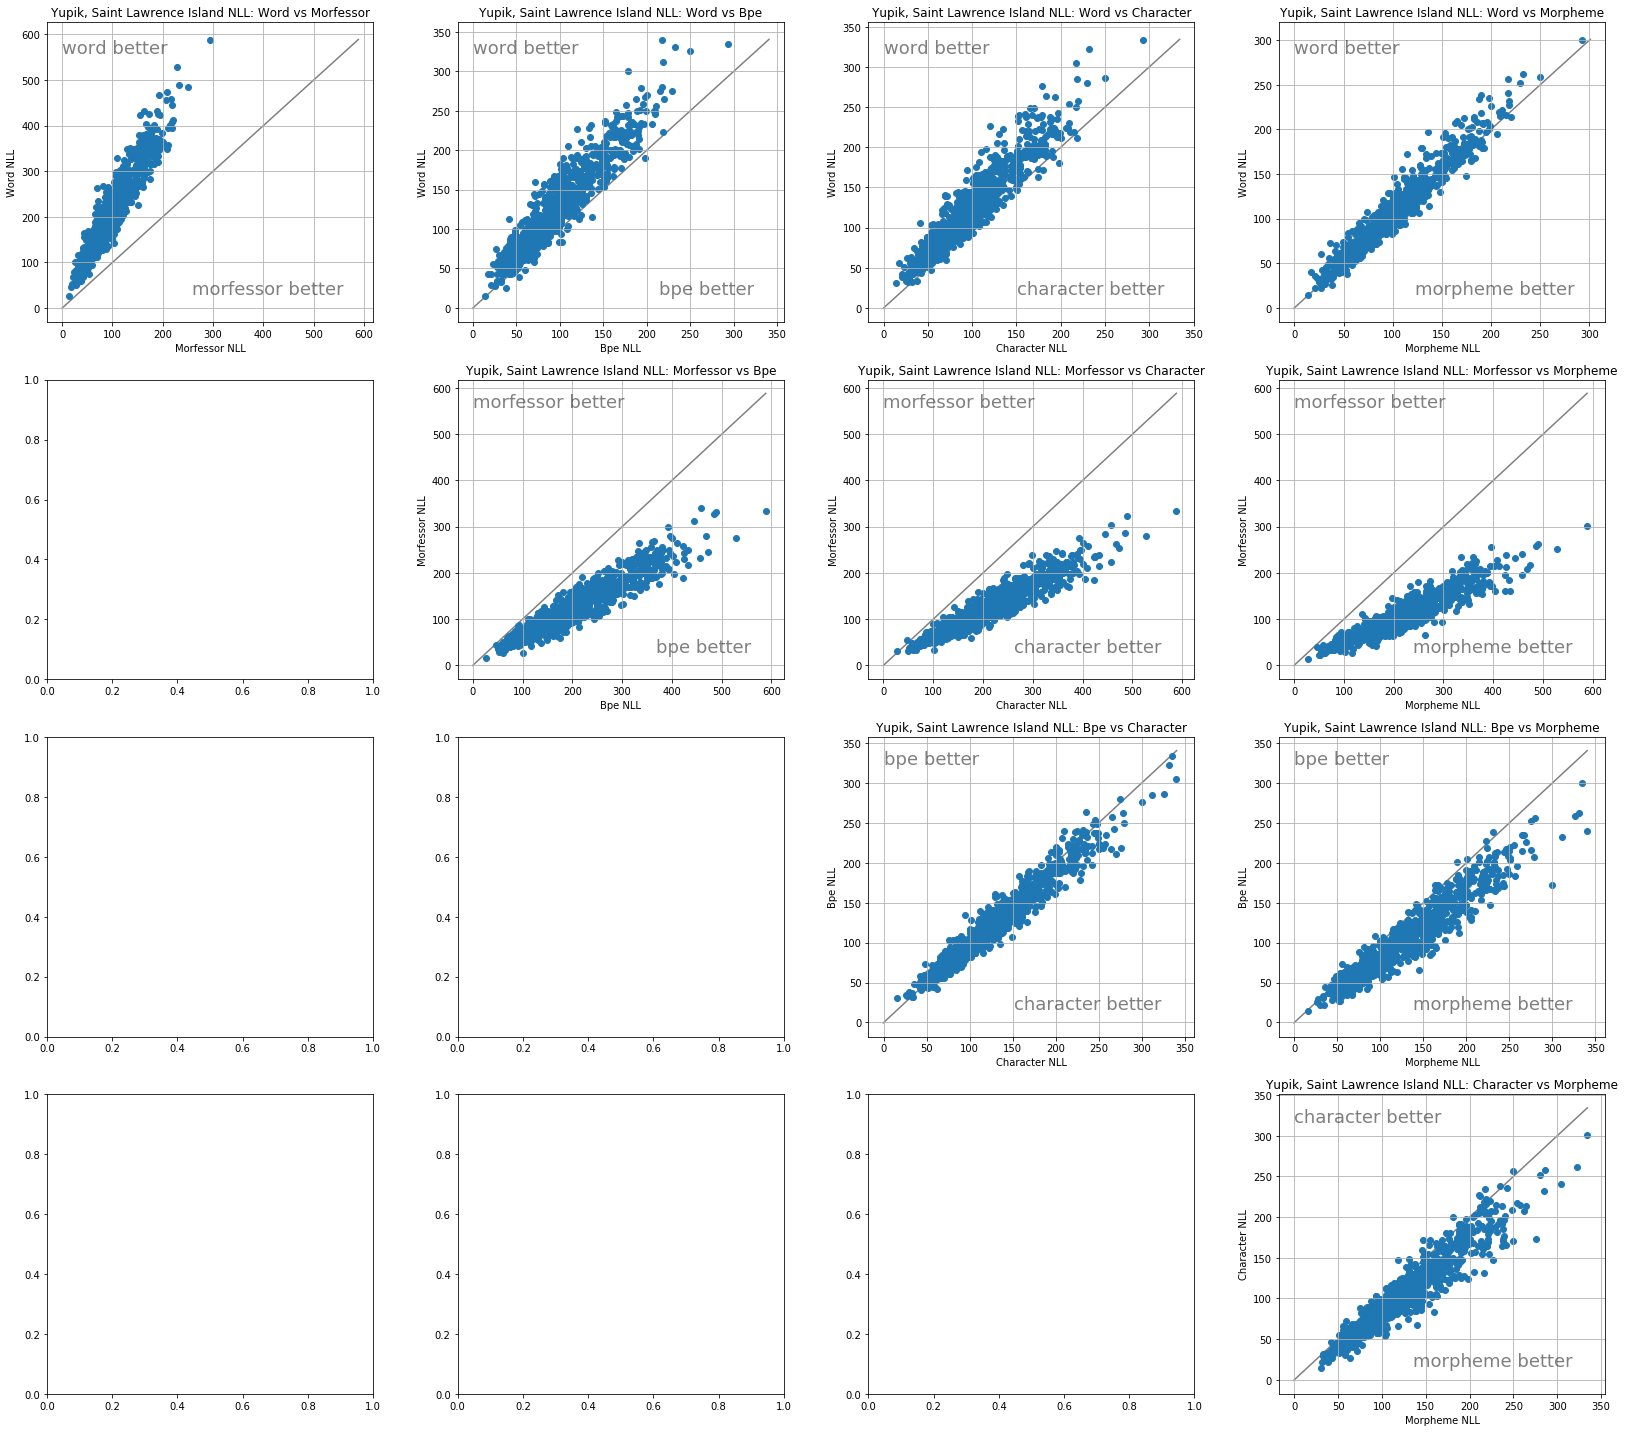

Processing Yupik, Central


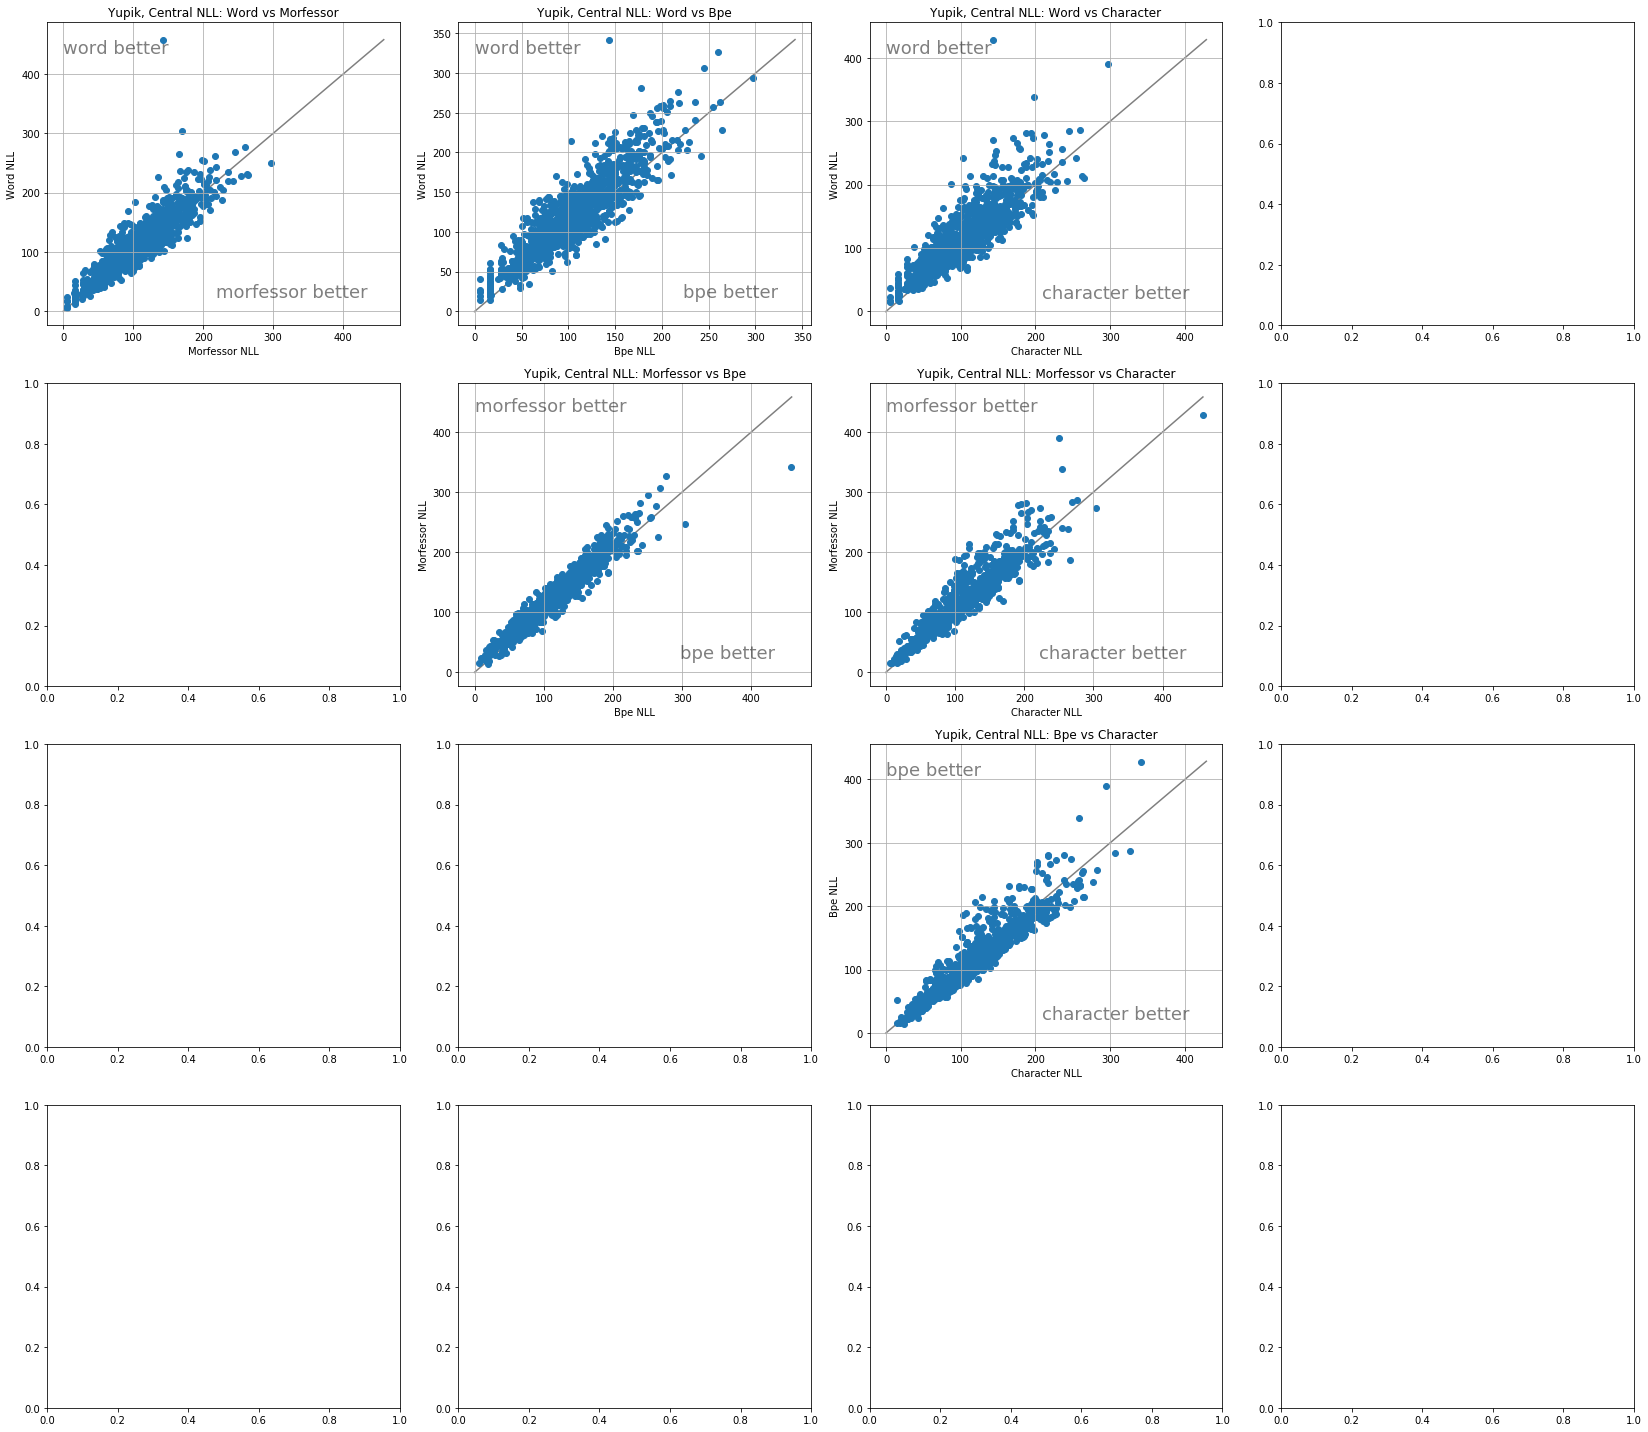

Processing Guarani


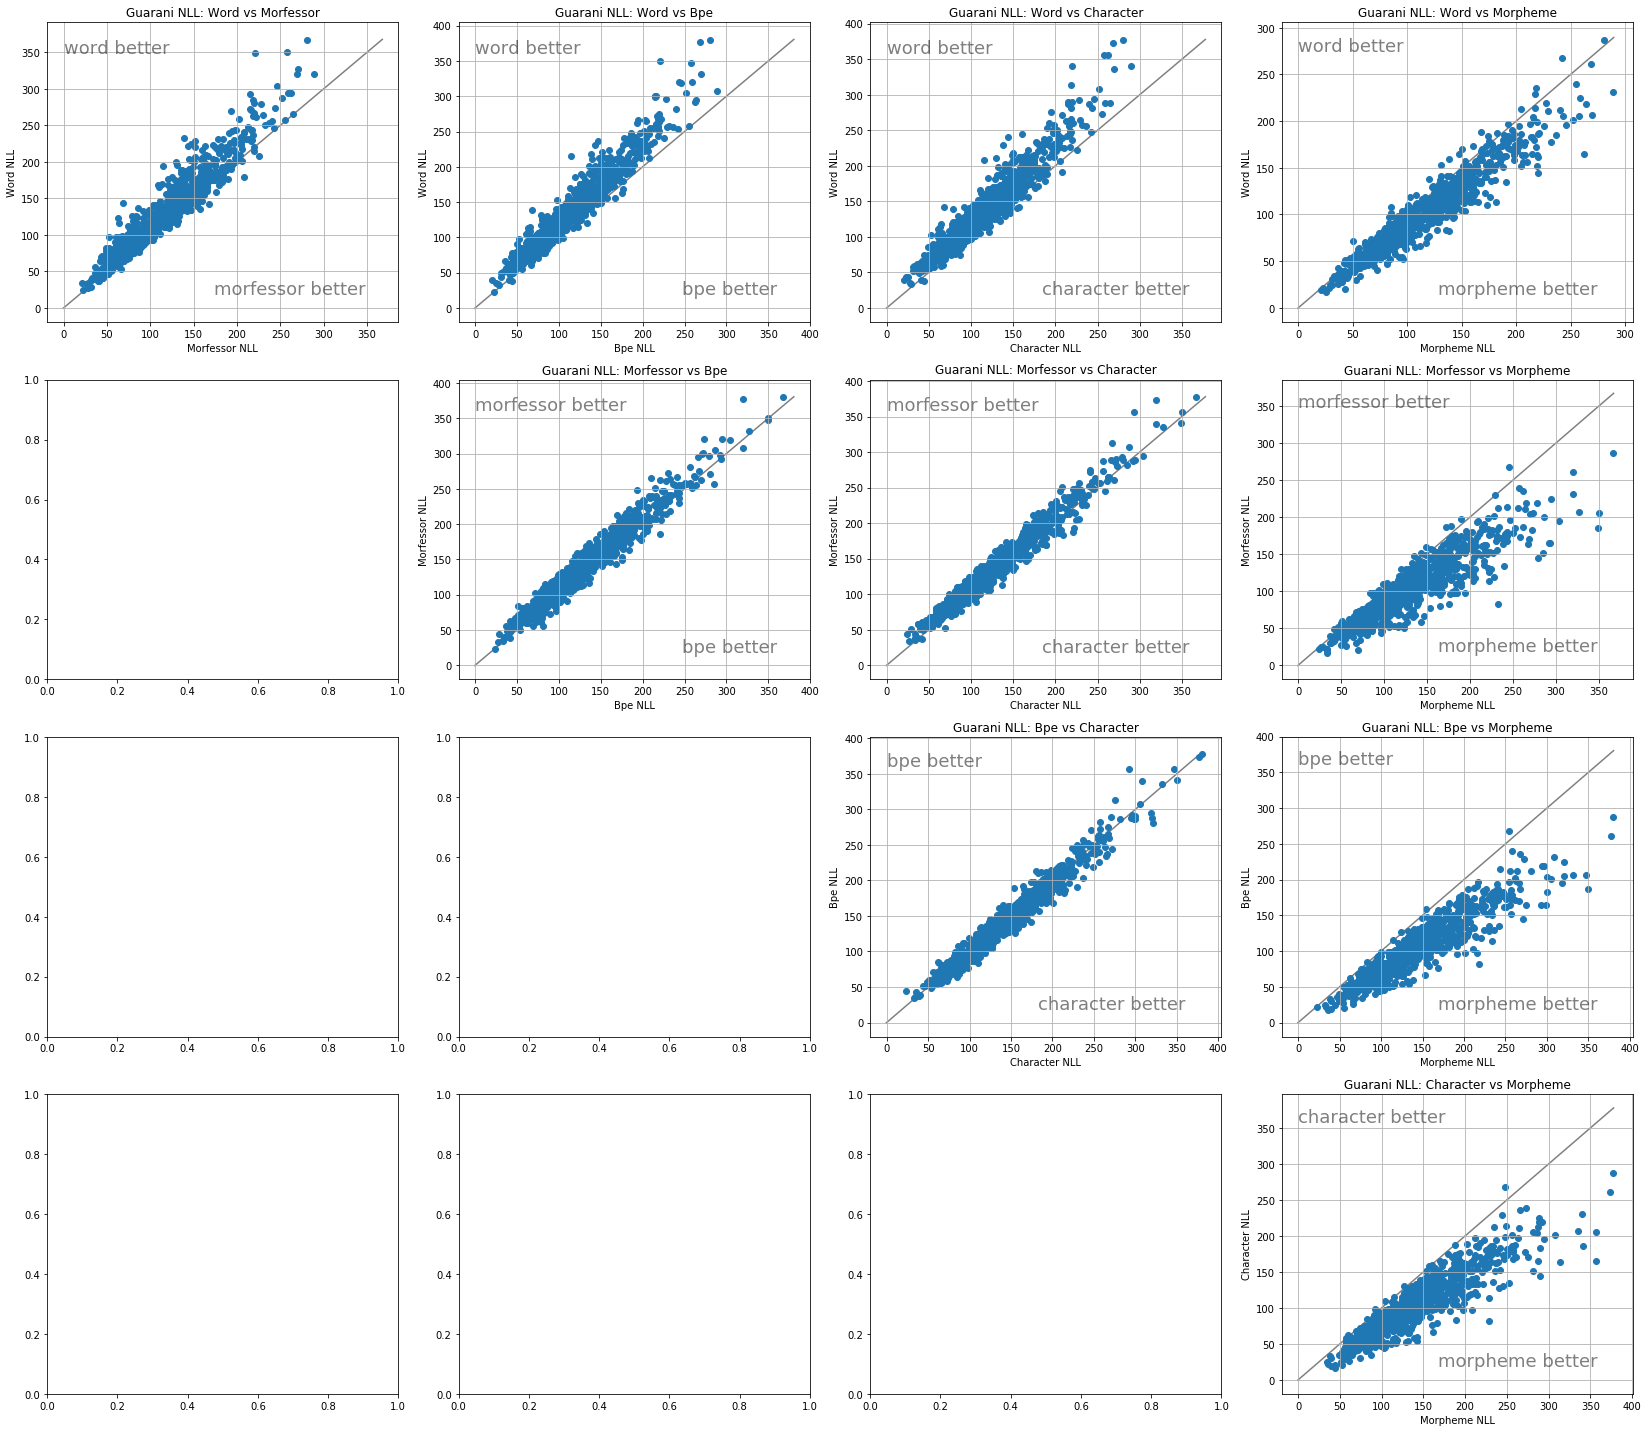

Processing Inuktitut


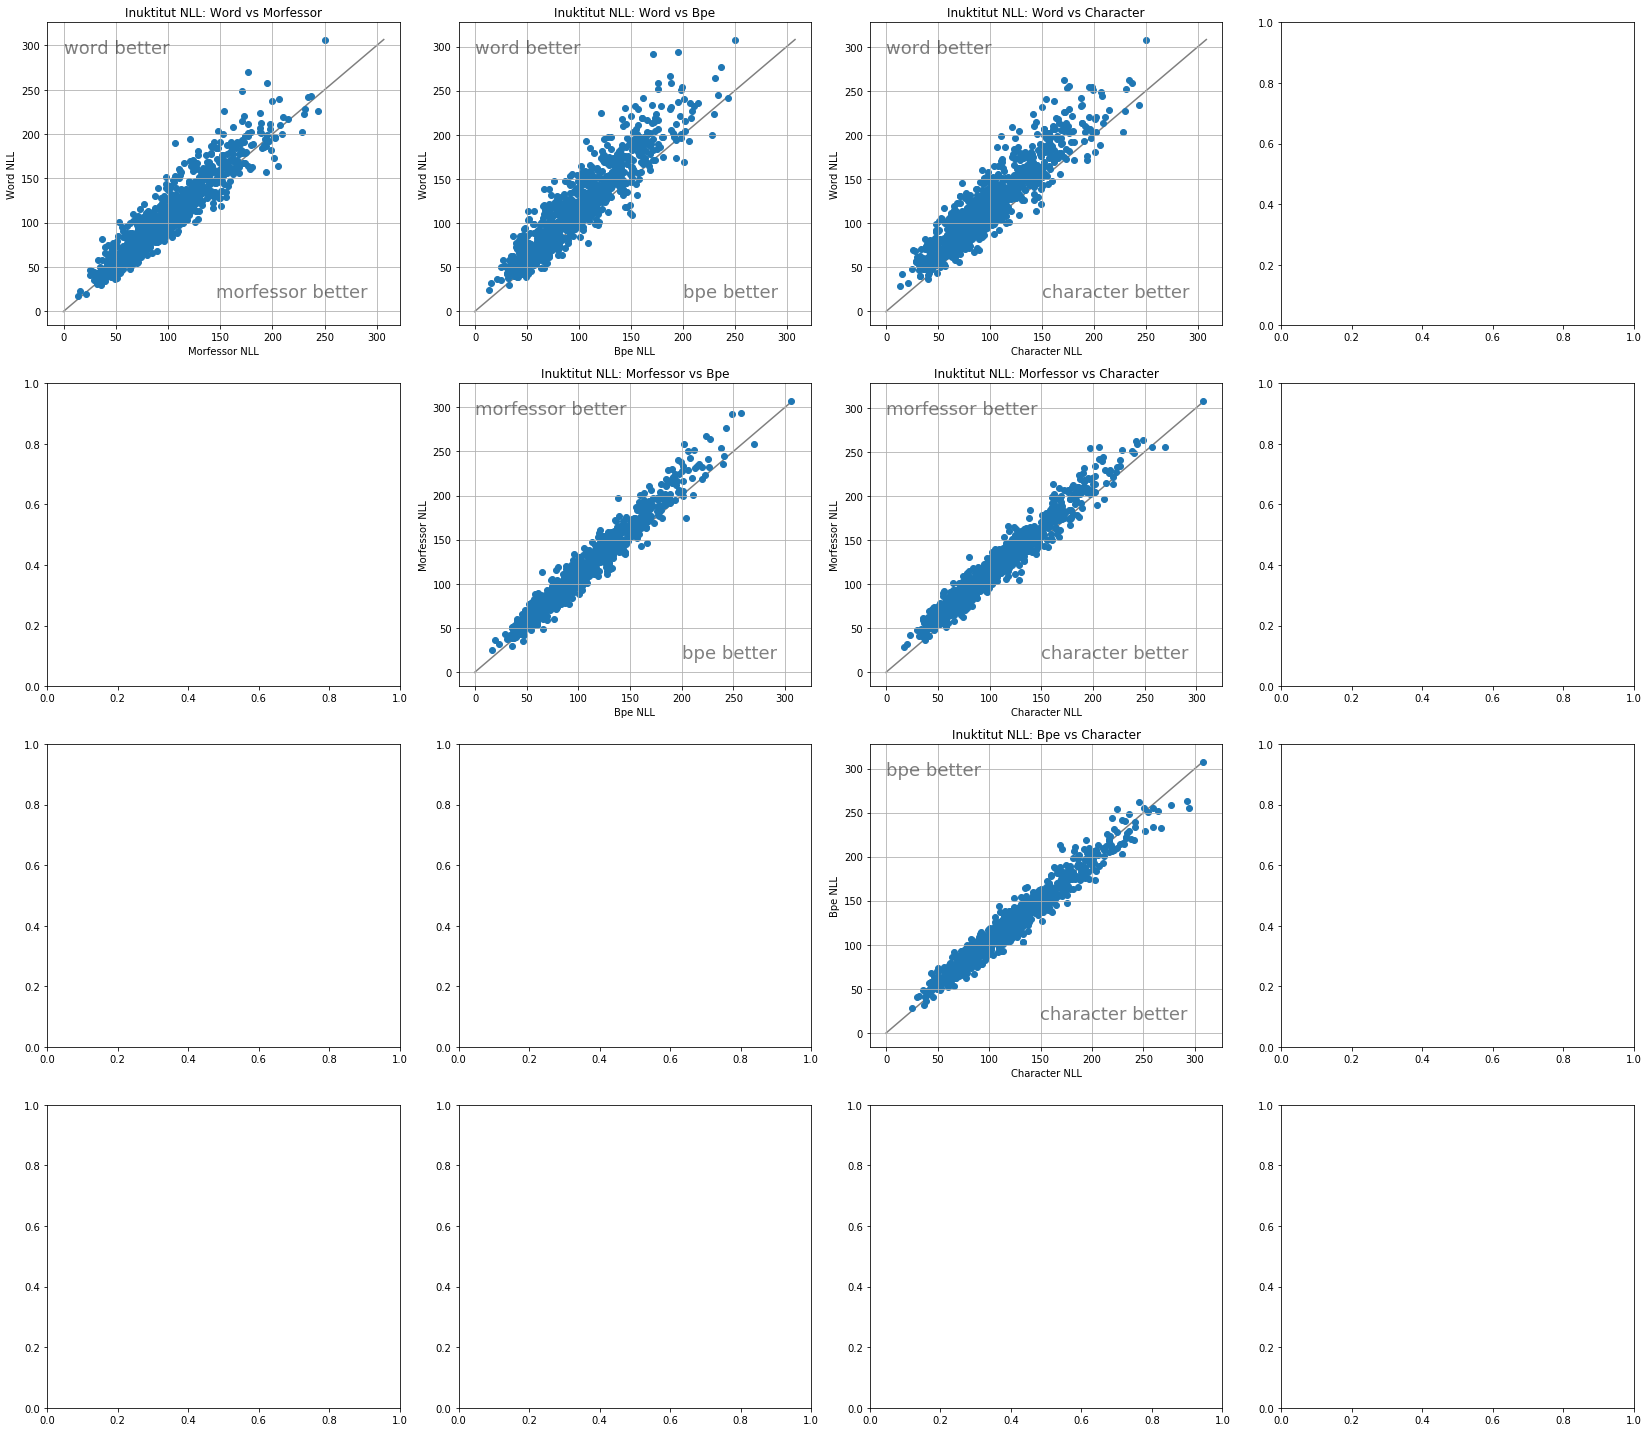

In [26]:
import json
import matplotlib.pyplot as plt
import math
import pandas as pd

lang_map = {'Yupik, Central': 'esu.csv',
            'Yupik, Saint Lawrence Island': 'ess.csv',
            'Guarani': 'grn.csv',
            'Inuktitut': 'iku.csv'}

for lang, path in sorted(lang_map.items(), key=lambda x:x[1]):
    lang_code = path.split('.')[0]
    print('Processing {}'.format(lang))
    data = pd.read_csv(path)
    cols = ['word', 'morfessor', 'bpe', 'character', 'morpheme']
    fig, axes = plt.subplots(figsize=(23,20), nrows=4, ncols=4)
    for col1_idx in range(4):
        col1 = cols[col1_idx]
        for col2_idx in range(col1_idx+1, 5):
            col2 = cols[col2_idx]
            if col2 not in data:
                continue
            if col1 == col2:
                continue
            x = data[col1]
            y = data[col2]
            scatter_figpath = '{}_{}-{}.png'.format(lang_code, col1, col2)
            ax = axes[col1_idx][col2_idx-1]
            max_val = max([max(x), max(y)])
            ax.plot([-0.5, max_val+0.5], [-0.5, max_val+0.5], color='black', zorder=-1, alpha=0.5)
            ax.scatter(x, y)
            ax.set_ylabel('{} NLL'.format(col1.title()))
            ax.set_xlabel('{} NLL'.format(col2.title()))
            ax.set_title('{} NLL: {} vs {}'.format(lang, col1.title(), col2.title()))
            ax.grid()
            ax.annotate('{} better'.format(col1), (0, 0.95*max_val), fontsize=18, alpha=0.5)
            ax.annotate('{} better'.format(col2), (0.95*max_val, 0.05*max_val), fontsize=18, alpha=0.5, ha='right')
    plt.tight_layout()
    plt.savefig(scatter_figpath)
    plt.show()
    plt.close()